<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 3: Large Margin Classifiers</H2>

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
| 26th February 2019  | **  Monday 11th March ** |


This workshop is worth 30% of the total module mark.


Candidate number:  <font color="red">*660028124*</font>

Marking is anonymous, so please don't write your name or reveal your identity!



Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
</div>


# Large margin classifiers and support vector machines

The aim of this workshop is to write and test code for a nonlinear support vector machine.  It builds on and repeats some of the last workshop and is done in stages:

1. You will do a couple of exercises to familiarise yourself with constrained optimisation and the Lagrangian dual formulation.
1. Initially, you will write a linear large margin classifier for linearly separable data.
1. The next stage is to modify this code, which uses a *hard margin* to a soft margin.
1.  Finally, you will use the *kernel trick* to map the data to a high-dimensional feature space, while calculating the necessary inner-products in the original data space.

At each stage, you should test your code on the provided data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Part 1. Constrained optimisation with equality constraints

To begin with we will solve an optimisation problem with equality constraints.  The problem is defined for a two-dimensional $\mathbf{x} = (x_1, x_2)^T$ as follows:
\begin{align*}
    \mbox{min}_\mathbf{x} ~~ f(\mathbf{x}) &= x_1^2+ 3x_2^2\\
    \text{such that}\qquad & x_1 + x_2 = 1
\end{align*}

In this part, you will be asked to solve the problem "by hand", using markdown cells to explain your steps. 

To see what is going on, make a contour plot of $f(\mathbf{x})$ and draw the contraint line on it.  The following code will draw the contour.  You should add the constraint line. 

You should be able to approximately read the value and location of the contrained minimum from your plot.

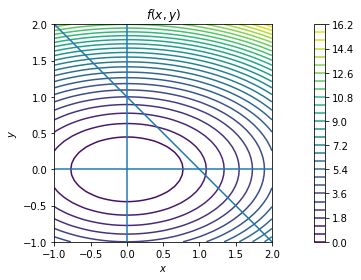

In [2]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
#     x + y ==1
    return x*x + 3*y*y

x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)


X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.plot(x,1-x)

plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)



# plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 30)
plt.colorbar()
plt.axis('scaled')
plt.show()

<b>1.1)</b>
Write the contraint in standard form $h(\mathbf{x}) = 0$ and therefore write down the Lagrangian, $L(\mathbf{x}, \nu)$.  You could do this and the following cells on a piece of paper, but it's not too hard to put it into LaTeX for posterity.
<div style="text-align: right"><b>[4 marks]</b></div>

When $h(x)= 0$,  

<b>Constraint:</b> $x_1 + x_2 = 1$,

$\therefore h(x)= x_1 + x_2 -1 = 0$

$L(x,\nu) = f(x)+\nu\cdot h(x)$,

$\therefore L(x,\nu) =x_{1}^{2} + 3x_{2}^{2} + \nu\cdot (x_1+x_2 -1) $


<b>1.2)</b>
First, minimise the unconstrained minimisation problem by minimising $L(\mathbf{x}, \nu)$ with respect to $\mathbf{x}$ and $\nu$.  This is done by setting the partial derivatives with respect to $x_1$, $x_2$ and $\nu$ to zero and solving for $x_1$, $x_2$ and $\nu$.
<div style="text-align: right"><b>[5 marks]</b></div>



<b> A.</b> $\frac{\partial L(x,\nu)}{\partial \nu} = x_1 +x_2 - 1$

<b> B.</b> $\frac{\partial L(x,\nu)}{\partial x_1} = 2 x_1 + \nu $

<b> C.</b> $\frac{\partial L(x,\nu)}{\partial x_2} = 6 x_2 + \nu$

When <b> A</b>,<b> B</b>,<b> C</b> $= 0$

We take $\frac{\partial L(x,\nu)}{\partial x_1} = \frac{\partial L(x,\nu)}{\partial x_2}$ to find the minimum.

$  2 x_1 + \nu = 6  x_2 + \nu$

$ 2 x_1 = 6 x_2 $

$ x_1 = 3  x_2 $

Find $x_2$ :

$ x_2 =  \frac{x_1}{3} ~and~ (x_1 + x_2 = 1)$

$\therefore x_1 = 1-x_2$

Substitute $x_1: ~~ x_2 = \frac{1-x_2}{3}$

$4 x_2 = 1$

$x_2 = \frac{1}{4}$

Find $x_1$: 

Using: $x_1 = 3  x_2$, we know the value of $x_2$, so we substitute $x_2$.

$x_1 = \frac{3}{4}$

$\nu = -2  x_1$

$\therefore  \nu = \frac{-3}{2} $

<b>1.3)</b> 
Plot the minimising point on your contour plot and verify that agrees with  the constraint and the function value at the constrained minimum.
<div style="text-align: right"><b>[2 marks]</b></div>

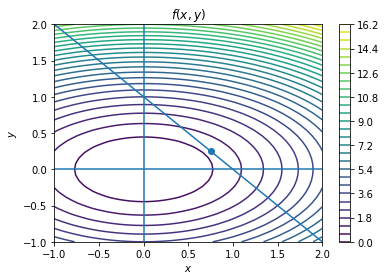

In [3]:
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)


X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.plot(x,1-x)

plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

plt.scatter([0.75],[0.25])

# plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 30)
plt.colorbar()
# plt.axis('scaled')
plt.show()

<b>1.4)</b>
Now we will solve the problem again, but this time by finding the Lagrangian dual function, which we will maximise to find the optimal dual variable $\nu$ and thus the optimal $\mathbf{x}$.

By setting the derivative of the Largrangian with respect to $\mathbf{x}$ to zero, find the Largrangian dual function $g(\nu)$. 
<div style="text-align: right"><b>[5 marks]</b></div>

$g(\lambda,\nu) = \min_x \left[ f_0(x) + \sum_{i=1}^m \lambda_if_i(x) +\sum_{j=1}^p \nu_jh_j(x) \right]$

where $f_0(x) = f(x)$

$g(\nu) =\min_x \left[x_1^2 + 3x_2^2+\nu\cdot(x_1 + x_2-1)\right]$

Since $g(\lambda,\nu) = g(\nu) $

$L(x,\nu) =x_{1}^{2} + 3x_{2}^{2} + \nu\cdot (x_1+x_2 -1) $ 

Set the derivative of the Largrangian with respect to  𝐱  to zero:

<b> A.</b> $\frac{\partial L(x,\nu)}{\partial x_1} = 2 x_1 + \nu $

<b> B.</b> $\frac{\partial L(x,\nu)}{\partial x_2} = 6 x_2 + \nu$

When <b>A, B</b> = 0

$x_1 = \frac{-\nu}{2}$ and $x_2 = \frac{-\nu}{6} $

Substitute $x_1$ and $x_2$ in $g(\nu)$

$g(\nu) = \frac{\nu^2}{4} +\frac{\nu^2}{12}+\nu(\frac{-\nu}{2}+\frac{-\nu}{6}-1) $

$\therefore g(\nu) = -\nu-\frac{\nu^2}{3}$

<b>1.5)</b>
Maximise $g(\nu)$ with respect to $\nu$ and so find the optimal dual variable $\nu^\star$ and thus $g(\nu^\star)$.
<div style="text-align: right"><b>[5 marks]</b></div>

$\frac{\partial g(\nu)}{\partial \nu} = 0$

Find the derivative of $g(\nu)$ in with respect to $v$ 

$\frac{\partial g(\nu)}{\partial v} = -1-\frac{2\nu}{3} = 0$

Find $\nu$ when $\frac{\partial g(\nu)}{\partial \nu} = 0$

$v = \frac{\nu^2}{3} = \nu^*$

$\therefore g(\nu^*) = \frac{3}{4}$

<b>1.6)</b>
Use the relations you derived when finding the Lagrangian dual function to get $\mathbf{x}^\star$ from $\nu^\star$.  Thus find $f(\mathbf{x}^\star)$ and verify that it equals $g(\nu^\star)$.

<div style="text-align: right"><b>[4 marks]</b></div>

$x^* = (x_1,x_2)$ and when $\nu =  g(\nu^*) = \frac{3}{4}$

$\therefore x_1^* = \frac{1}{4}$ and $x_2^* = \frac{1}{4}  $

Using these value in $f(x^*)$ 

$f(x^*) = \left(\frac{3}{4}\right)^2 + 3\left(\frac{1}{4}\right)^2$

$\therefore f(x^*) = \frac{3}{4}$ which is equal to $g(\nu^*)$

## Part 2. Quadratic programming

At the heart of the dual formulation of the large margin classifier (LMC) is the quadratic programme with constraints.  For example, for the hard LMC the dual Lagrange function to be *maximised* is:
\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}
      
There are a number of quadratic progamming functions that you could use, but I recommend that you use those from [cvxopt](http://cvxopt.org/).  On the workshop machines you should be able to import the module with:

    import cvxopt
    
If you want to use `cvxopt` on your own machine then you can install it from a shell with `conda`

    conda install cvxopt

## `cvxopt` example

Here is an example of solving a constrained quadratic program (QP) with `cvxopt`. This is largely copied from https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.  In particular, note that you will want to *maximise* the Lagrangian dual $g(\mathbf{\alpha})$, so you will have to write the maximisation as the minimisation of $-g(\mathbf{\alpha})$.

Here is a simple example:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}


Evaluate the objective function on a grid covering the range $[-5, 20] \times [-5, 20]$ and so plot contours of the objective function.  Augment your plot with lines showing the inequalities and so, by eye, find the minimum of the objective function. 

(If you want to be fancy -- not necessary -- you could use the [fillplots](https://github.com/tkf/fillplots) module to plot the region defined by the inequalities.

The problem can be written in standard form as:

\begin{align*}
  \min_{x, y} \tfrac{1}{2}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}^T
  \begin{bmatrix}
    1 & 0\\
    0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  +
   \begin{bmatrix}
    3 \\ 4
  \end{bmatrix}^T
 \begin{bmatrix}
    x \\ y
  \end{bmatrix}\\
  \begin{bmatrix}
    -1 & 0\\
    0 & -1\\
    -1 & -3\\
    2 & 5\\
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}  
  \preceq
  \begin{bmatrix}
    0 \\ 0 \\ -15 \\ 100 \\ 80
  \end{bmatrix}
\end{align*}

Note that all the inequality constraints have been gathered into the matrix $G$ and that since there are no equality constraints $A$ and $b$ do not need to be specified.  Note
that even though $y^2$ did not appear in the original objective, we had to include it with zero coefficients in P because the solver parameters must be defined using the full set of variables.  Even if certain variables only appear in constraints, they will still need to be expressed with zero coefficients in the objective parameters, and *vice versa*.

<div style="text-align: right"><b>[5 marks]</b></div>

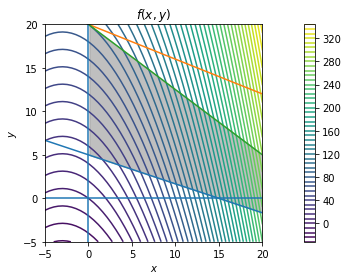

In [4]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
#     x + y ==1
    return(0.5 * x*x + 3*x + 4*y)

x = np.linspace(-5, 20, 50)
y = np.linspace(-5, 20, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
a1 = (15-x)/3 
a2 = (100-2*x)/5
a3 = (80-3*x)/4
a4 = 0*x
plt.fill_between(x,a1,a3,where=(x>0),color='grey', alpha='0.5')

plt.plot(x,a1)
plt.plot(x,a2)
plt.plot(x,a3)
                                  
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

# plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 50)
plt.colorbar()
plt.axis('scaled')
plt.ylim(top = 20)
plt.show()

Matrices specifying the QP to  `cxvopt` are defined using the `cvxopt` matrices.  Since you will be using `numpy` arrays to store the data for your LMC and SVM, we will define the `cvxopt` matrices via `numpy` arrays as follows.  

In [5]:
from cvxopt import matrix

In [6]:
P = matrix(np.diag([1,0]), tc='d') 
q = matrix(np.array([3,4]), tc='d')
G = matrix(np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(np.array([0,0,-15,100,80]), tc='d')

The `tc='d'` argument ensures that the matrices are floating point numbers rather than integers (`tc` stands for "typecode").

Now, at last, we can solve the QP:

In [7]:
from cvxopt import solvers
sol = solvers.qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.


If there were equality constraints (and don't forget that you will have an equality constraint!) you would get the solution with 

    sol = solvers.qp(P, q, G, h, A, b)

Information about the solution can be found from the `sol` dictionary

In [8]:
print('The solution is\n', sol['x'])
print('The objective is', sol['primal objective'])

The solution is
 [ 7.13e-07]
[ 5.00e+00]

The objective is 20.00000617311241


More information from the various key-value pairs in the dictionary.  See the [`cxvopt` documentation](http://cvxopt.org/userguide/index.html) for more information on what these mean.

In [9]:
for k, v in sol.items():
    print("+ Key:",k,"\n-Value:", v,"\n")

+ Key: x 
-Value: [ 7.13e-07]
[ 5.00e+00]
 

+ Key: y 
-Value:  

+ Key: s 
-Value: [ 7.13e-07]
[ 5.00e+00]
[ 3.74e-06]
[ 7.50e+01]
[ 6.00e+01]
 

+ Key: z 
-Value: [ 1.67e+00]
[ 2.35e-08]
[ 1.33e+00]
[ 1.51e-08]
[ 2.28e-08]
 

+ Key: status 
-Value: optimal 

+ Key: gap 
-Value: 8.788553731701274e-06 

+ Key: relative gap 
-Value: 4.3942774404993765e-07 

+ Key: primal objective 
-Value: 20.00000617311241 

+ Key: dual objective 
-Value: 19.99999738455868 

+ Key: primal infeasibility 
-Value: 1.1710307819972547e-16 

+ Key: dual infeasibility 
-Value: 1.9860273225978186e-16 

+ Key: primal slack 
-Value: 7.131816408857108e-07 

+ Key: dual slack 
-Value: 1.50695110360481e-08 

+ Key: iterations 
-Value: 8 



Check that the solution you've found agrees with your plot!   You should now be equipped to solve constrained quadratic optimisation problems.
<div style="text-align: right"><b>[5 marks]</b></div>

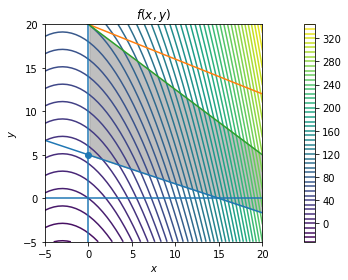

In [10]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
#     x + y ==1
    return(0.5 * x*x + 3*x + 4*y)

x = np.linspace(-5, 20, 50)
y = np.linspace(-5, 20, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
a1 = (15-x)/3 
a2 = (100-2*x)/5
a3 = (80-3*x)/4
a4 = 0*x
plt.fill_between(x,a1,a3,where=(x>0),color='grey', alpha='0.5')

plt.plot(x,a1)
plt.plot(x,a2)
plt.plot(x,a3)
 
plt.scatter(sol['x'][0],sol['x'][1])
    
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

# plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 50)
plt.colorbar()
plt.axis('scaled')
plt.ylim(-5, 20)
plt.xlim(-5, 20)

plt.show()

The solution found agrees with my plot. The lowest point is 

# Part 3. Hard, large margin classifier

Given a linearly separable training data set `X` and `t`, write a function 

    sv, score = lmc(X, t, Xtest)

to construct a large margin classifier for the data and to classify the data in `Xtest`. 

Your function should construct and solve the Lagrangian dual function for a vector of $\alpha$s.  The the non-zero $\alpha$ correspond the support vectors and your function should return a vector, `sv` of indices of the support vectors in `X` (or a Boolean array indicating the SVs).   Your function should also return a vector, `score`, of the signed distances of each `Xtest` from the optimal hyperplane. The signed distance is the distance from the hyperplane, with the sign specifying which side of the hyperplane the point is on.  It is easily calculated from $\mathbf{w}^T \mathbf{x} + b$.  

Note when classifying an observation $\mathbf{x}$ it is best not to calculate the coefficients $\mathbf{w}$ in order to calculate the discriminant function $\mathbf{w}^T \mathbf{x} + b$.  This is because later, when we use a kernel to map to higher dimensional spaces, $\mathbf{w}$ may be very high dimensional (possibly infinite dimensional).  Instead calculate the discriminant function from the $\mathbf{x}_n, t_n$ and $\alpha_n$.

<div style="text-align: right"><b>[10 marks]</b></div>

In [11]:
def lmc(X, t, Xtest):
    #Compute alpha
    B = []
    Y=[]
    m,n = X.shape
    t = t.reshape(-1,1) * 1.
    X_dash = t * X
    H = np.dot(X_dash , X_dash.T) * 1.

    #Converting into cvxopt format
    P = matrix(H)
    q = matrix(-np.ones((m, 1)))
    G = matrix(-np.eye(m))
    h = matrix(np.zeros(m))
    A = matrix(t.reshape(1, -1))
    b = matrix(np.zeros(1))

    #Setting solver parameters (change default to decrease tolerance) 
    solvers.options['show_progress'] = False
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10

    #Run solver
    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(sol['x'])
    w = ((t * alpha).T @ X).reshape(-1,1)
    #Selecting the set of indices S corresponding to non zero parameters
    S = (alpha > 1e-4).flatten()
    sv = np.array(np.nonzero(S))[0]
    #Computing b
    b = t[S] - np.dot(X[S], w)
    w = w.flatten()
    b = np.mean(b)
    
    # Plot Hyperplane
    x = np.linspace(-2,6)
    a1 = f(x, w, b)
    b1 = f(x, w, b, 1)
    b2 = f(x, w, b, -1)
    plt.plot(x, b1, 'k--')
    plt.plot(x, b2, 'k--')
    plt.plot(x, a1, linestyle = '-', color = 'darkblue', alpha = .5 )
    B.append(b)
    for x in range(len(Xtest)):
        y=np.mean(B)
        for i in range(len(alpha)):        
            y+= alpha[i]*t[i]*sum([x * y for x, y in zip(X[i], Xtest[x])])
        Y.append(y)
    Y = np.array(Y).flatten()    
    alpha = alpha.flatten()
    for y in sv:
        a1 = X[y]
        plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')
#         plt.plot(a1[0], a1[1], 'yo')
    return sv,Y

Test your code on the following two-dimensional separable data.  Plot the data, the separating hyperplane and its margins, together with the support vectors.
<div style="text-align: right"><b>[5 marks]</b></div>

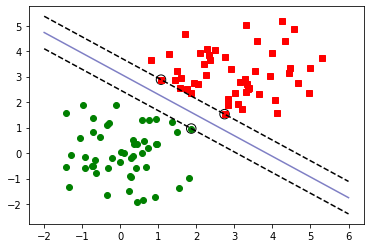

In [12]:
separable = np.loadtxt('separable.txt')
X = separable[:,:2]
t = separable[:,2]
# print(X)
# w.x + b = 0
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]


plt.plot(X[t==-1,0], X[t==-1,1], 'go')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

sv, score = lmc(X, t, X)
# print(sv,"\n",score)
plt.show()

What happens if the data are not separable?  Try it.

<div style="text-align: right"><b>[5 marks]</b></div>

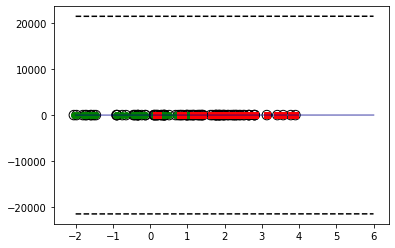

In [13]:
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

plt.plot(X[t==-1,0], X[t==-1,1], 'go')
plt.plot(X[t==1,0], X[t==1,1], 'rs')
lmc(X, t, X)
plt.show()

Classifed all as support vectors.It terminates and doesn't work.

# Part 4. Soft, large margin classifier

Of course, most interesting data sets are not linearly separable.  Using your `lmc` function as a basis, write a new function:

    sv, score = lsvm(X, t, C, Xtest)

that implements a soft large margin classifier. The additional parameter `C` should specify the relative weight given to the emperical error versus the regularisation term.
<div style="text-align: right"><b>[10 marks]</b></div>

In [14]:
def lsvm(X, t, C, Xtest,draw = True):
    #Initializing values and computing H. Note the 1. to force to float type
    B = []
    Y=[]
    m,n = X.shape
    t = t.reshape(-1,1) * 1.
    X_dash = t * X
    H = np.dot(X_dash , X_dash.T) * 1.

    #Converting into cvxopt format - as previously
    P = matrix(H)
    q = matrix(-np.ones((m, 1)))
    A = matrix(t.reshape(1, -1))
    b = matrix(np.zeros(1))    
    G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    
    #Run solver
    sol = solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    alphas = np.array(sol['x'])

    #==================Computing and printing parameters===============================#
    w = ((t * alphas).T @ X).reshape(-1,1)
    S = (alphas > 1e-4).flatten()
    # Support vectors have non zero lagrange multipliers
    sv = np.array(np.nonzero(S))[0]
    b = t[S] - np.dot(X[S], w)
    w = w.flatten()
    b = np.mean(b)
    
    B.append(b)

    for x in range(len(Xtest)):
        y=np.mean(B)
        for i in range(len(alphas)):        
            y+= alphas[i]*t[i]*sum([x * y for x, y in zip(X[i], Xtest[x])])
        Y.append(y)
    Y = np.array(Y).flatten()    
    alphas = alphas.flatten()

    return sv,Y 

Test your function on the following simple data set.   These data are drawn from two isotropic Gaussian distributions centred at $(0, 0)$ and $(2, 2)$, so the optimal separating hyperplane, in the limit of a large amount of data, is the perpendicular bisector of the line joining the centres.  As before, plot the separating hyperplane and the support vectors and make a contour plot of the score across the domain.
<div style="text-align: right"><b>[5 marks]</b></div>

How does the width of the margin vary with `C`?  Explain why.
<div style="text-align: right"><b>[5 marks]</b></div>

The C parameter informs the SVM optimization how far you want to stop misclassifying each of the training instances. For high C numbers, the algorithm will use a smaller-margin hyperplane if the hyperplane does a good job of getting all the training points accurately categorised. Alternatively, a very low value of C would lead the optimizer to search for a larger margin of hyperplane separation, whether the hyperplane misclassifies further items. I got misclassified instances for quite small C values, often even when my training data was linearly separable.

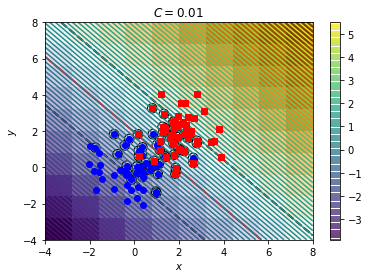

In [15]:
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

np.random.seed(0)
C = 0.01
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$C = %.2f$ '%(C))

X1, X2 = np.meshgrid(np.linspace(-4,8,10), np.linspace(-4,8,10))

Xp = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

#  Call function
sv,score = lsvm(X, t, C, Xp,False)


score = score.reshape(X1.shape)



for y in sv:
    a1 = X[y]
    plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')
    

Z = score.reshape(X1.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(X1.min(), X1.max(), X2.min(), X2.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)



plt.contour(X1, X2, Z, levels = [0], colors='r', linewidths=2, origin='lower')
plt.contour(X1, X2, Z + 1, [0.0],colors='k', linewidths=2,linestyles='dashed')
plt.contour(X1, X2, Z - 1, [0.0],colors='k', linewidths=2,linestyles='dashed')


plt.contour(X1, X2, score,100)
plt.colorbar()
plt.axis([-4, 8, -4, 8])

plt.show()

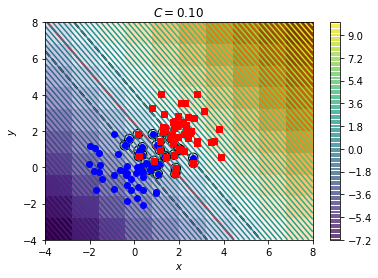

In [16]:
np.random.seed(0)
C = 0.1
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$C = %.2f$ '%(C))

X1, X2 = np.meshgrid(np.linspace(-4,8,10), np.linspace(-4,8,10))

Xp = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

#  Call function
sv,score = lsvm(X, t, C, Xp,False)


score = score.reshape(X1.shape)



for y in sv:
    a1 = X[y]
    plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')
    

Z = score.reshape(X1.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(X1.min(), X1.max(), X2.min(), X2.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)



plt.contour(X1, X2, Z, levels = [0], colors='r', linewidths=2, origin='lower')
plt.contour(X1, X2, Z + 1, [0.0],colors='k', linewidths=2,linestyles='dashed')
plt.contour(X1, X2, Z - 1, [0.0],colors='k', linewidths=2,linestyles='dashed')

plt.contour(X1, X2, score,100,Fill="on")
plt.colorbar()
plt.axis([-4, 8, -4, 8])
plt.show()

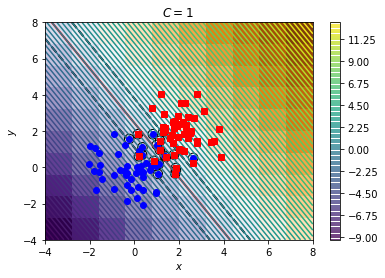

In [17]:
np.random.seed(0)
C = 1
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$C = %d$ '%(C))

X1, X2 = np.meshgrid(np.linspace(-4,8,10), np.linspace(-4,8,10))

Xp = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

#  Call function
sv,score = lsvm(X, t, C, Xp,False)


score = score.reshape(X1.shape)



for y in sv:
    a1 = X[y]
    plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')
    

Z = score.reshape(X1.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(X1.min(), X1.max(), X2.min(), X2.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)



plt.contour(X1, X2, Z, levels = [0], colors='r', linewidths=2, origin='lower')
plt.contour(X1, X2, Z + 1, [0.0],colors='k', linewidths=2,linestyles='dashed')
plt.contour(X1, X2, Z - 1, [0.0],colors='k', linewidths=2,linestyles='dashed')


plt.contour(X1, X2, score,100,Fill="on")
plt.colorbar()
plt.axis([-4, 8, -4, 8])
plt.show()

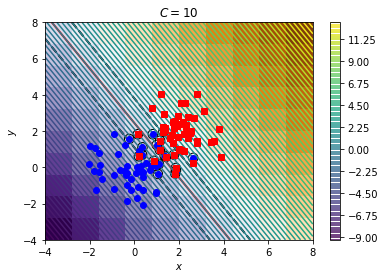

In [18]:
np.random.seed(0)
C = 10
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$C = %d$ '%(C))

X1, X2 = np.meshgrid(np.linspace(-4,8,10), np.linspace(-4,8,10))

Xp = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])

#  Call function
sv,score = lsvm(X, t, C, Xp,False)


score = score.reshape(X1.shape)



for y in sv:
    a1 = X[y]
    plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')
    

Z = score.reshape(X1.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(X1.min(), X1.max(), X2.min(), X2.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)



plt.contour(X1, X2, Z, levels = [0], colors='r', linewidths=2, origin='lower')
plt.contour(X1, X2, Z + 1, [0.0],colors='k', linewidths=2,linestyles='dashed')
plt.contour(X1, X2, Z - 1, [0.0],colors='k', linewidths=2,linestyles='dashed')


plt.contour(X1, X2, score,100,Fill="on")
plt.colorbar()
plt.axis([-4, 8, -4, 8])
plt.show()

# Part 5. Nonlinear SVM

Finally, using your `lsvm` code as a basis, write a new function to implement a fully nonlinear SVM with a user-specfied kernel function.   Your code should have the signature:

            sv, score = svm(X, t, C, kernel, Xtest)
    
where the `X`, `t`, `C` and `Xtest` are as before and `kernel` is a function that evaluates a kernel and can be called by your svm to evaluate the similarity of any pair of vectors:

    ip = kernel(x, y)     # inner product in some high-dimensional space

For example, the following cell implements an RBF kernel function

<div style="text-align: right"><b>[10 marks]</b></div>

In [19]:
def project(Xtest,kernel):
    y_predict = np.zeros(len(Xtest))
    for i in range(len(Xtest)):
        s = 0
        for a, sv_y, sv in zip(self_a, self_sv_y, self_sv):
            s += a * sv_y * kernel(Xtest[i], sv)
        y_predict[i] = s
    return y_predict + self_b

def fit(X,t,kernel):
    global self_a,self_sv_y,self_sv,self_b
    m, n = X.shape
    #Setting solver parameters (change default to decrease tolerance) 
    solvers.options['show_progress'] = False
    # Gram matrix
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i,j] = kernel(X[i], X[j])

    P = matrix(np.outer(t,t) * K)
    q = matrix(np.ones(m) * -1)
    A = matrix(t, (1,m))
    b = matrix(0.0)
    tmp1 = np.diag(np.ones(m) * -1)
    tmp2 = np.identity(m)
    G = matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(m)
    tmp2 = np.ones(m) * C
    h = matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    sol = solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(sol['x'])

    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self_a = a[sv]
    self_sv = X[sv]
    self_sv_y = t[sv]
    
    print("%d support vectors out of %d points" % (len(self_a), m))

    for y in ind:
        a1 = X[y]
        plt.scatter(a1[0], a1[1], s=90, facecolors='none', edgecolors='k')        
    # Intercept
    self_b = 0
    for n in range(len(self_a)):
        self_b += self_sv_y[n]
        self_b -= np.sum(self_a * self_sv_y * K[ind[n],sv])
    self_b /= len(self_a)
    return sv



def svm(X, t, C, kernel, Xtest):
    self_a = []
    self_sv_y=[]
    self_sv=[]
    self_b = []
    sv = fit(X, t,kernel)
    score = project(Xtest,kernel)
    return sv,score

In [20]:
# Show SVM
def plot_contour(xx,yy,result):
    #  Call function
    Z = result.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
       origin='lower', cmap=plt.cm.PuOr_r)
    plt.contour(xx, yy, Z, levels=[0],colors='k', linewidths=2)
    plt.contour(xx, yy, Z + 1, levels=[0],colors='g', linewidths=2,
                   linestyles='dashed')
    plt.contour(xx, yy, Z - 1, levels=[0],colors='r', linewidths=2,
                   linestyles='dashed')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=t, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.colorbar()
    plt.axis([-6, 8, -6, 8])
    plt.show()

In [21]:
def rbf(x, y, gamma=1):
    """RBF kernel with precision gamma."""
    d = x-y
    return np.exp(-gamma*np.dot(d, d))

def linear(x, y):
    return np.dot(x, y)

def polynomial(x, y, degree=3):
    return (1 + np.dot(x, y)) ** degree

In [22]:
np.random.seed(0)
xx, yy = np.meshgrid(np.linspace(-6, 8, 500),
                     np.linspace(-6, 8, 500))
separable = np.loadtxt('nonseparable.txt')
X = separable[:,:2]
t = separable[:,2]


Xp = np.c_[xx.ravel(), yy.ravel()]

21 support vectors out of 100 points


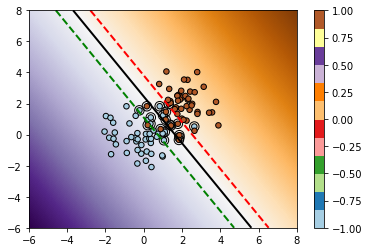

In [23]:
C  = 10
#  Call function
sv,score = svm(X, t, C, linear, Xp)

# Plot contour
plot_contour(xx,yy,score)

36 support vectors out of 100 points


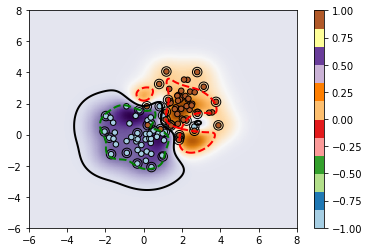

In [24]:
C =10
gamma = 0.01
#  Call function
sv,score = svm(X, t, C, rbf, Xp)

# Plot contour
plot_contour(xx,yy,score)

25 support vectors out of 100 points


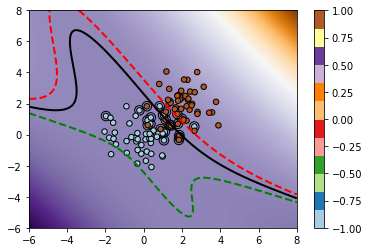

In [25]:
C =0.01
gamma = 0.01
degree = 1 
#  Call function
sv,score = svm(X, t, C, polynomial, Xp)

# Plot contour
plot_contour(xx,yy,score)

Test your code on the non-separable data above using a linear kernel, the RBF kernel and the polynomial kernel.  You will need to use cross-validation to choose the best parameters and it is fine to use the `scikit` cross validation and grid search machinery rather than writing your own.

<div style="text-align: right"><b>[5 marks]</b></div>

In [26]:
def project(Xtest,kernel):
    y_predict = np.zeros(len(Xtest))
    for i in range(len(Xtest)):
        s = 0
        for a, sv_y, sv in zip(self_a, self_sv_y, self_sv):
            s += a * sv_y * kernel(Xtest[i], sv)
        y_predict[i] = s
    return y_predict + self_b

def fit(X,t,kernel):
    global self_a,self_sv_y,self_sv,self_b
    m, n = X.shape
    #Setting solver parameters (change default to decrease tolerance) 
    solvers.options['show_progress'] = False
    # Gram matrix
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i,j] = kernel(X[i], X[j])

    P = matrix(np.outer(t,t) * K)
    q = matrix(np.ones(m) * -1)
    A = matrix(t, (1,m))
    b = matrix(0.0)
    tmp1 = np.diag(np.ones(m) * -1)
    tmp2 = np.identity(m)
    G = matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(m)
    tmp2 = np.ones(m) * C
    h = matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    sol = solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(sol['x'])

    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self_a = a[sv]
    self_sv = X[sv]
    self_sv_y = t[sv]
    
    # Intercept
    self_b = 0
    for n in range(len(self_a)):
        self_b += self_sv_y[n]
        self_b -= np.sum(self_a * self_sv_y * K[ind[n],sv])
    self_b /= len(self_a)
    return sv



def svm(X, t, C, kernel, Xtest):
    self_a = []
    self_sv_y=[]
    self_sv=[]
    self_b = []
    sv = fit(X, t,kernel)
    score = project(Xtest,kernel)
    return sv,score

In [28]:
C_values = [0.01, 0.1, 1, 10]

best_score = 0
best_params = {'C': None}

for C in tqdm(C_values):
    sv,score = svm(X, t, C, linear, Xp)
    score = np.mean(score)
        
    if score > best_score:
        best_score = score
        best_params['C'] = C

print('Best C:',best_params['C']) 

100%|██████████| 4/4 [01:00<00:00, 15.21s/it]


Best C: 0.01


In [32]:
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in tqdm(C_values):
    for gamma in gamma_values:        
        sv,score = svm(X, t, C, rbf, Xp)
        score = np.mean(score)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
print('Best C:',best_params['C']) 
print('Best Gamma:',best_params['gamma'])



  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [04:55<09:51, 295.50s/it]

 67%|██████▋   | 2/3 [07:22<04:11, 251.03s/it]

100%|██████████| 3/3 [09:23<00:00, 187.95s/it]


Best C: 10
Best Gamma: 0.01


In [33]:
C_values = [0.01, 0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]
p_values = [1,2]

best_score = 0
best_params = {'C': None, 'gamma': None,'degree': None}

for C in tqdm(C_values):
    for gamma in gamma_values:
        for p in p_values:
            sv,score = svm(X, t, C, polynomial, Xp)
            score = np.mean(score)
        
            if score > best_score:
                best_score = score
                best_params['C'] = C
                best_params['gamma'] = gamma
                best_params['degree'] = p

print('Best C:',best_params['C']) 
print('Best Gamma:',best_params['gamma'])
print('Best Degree:',best_params['degree'])                




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:42<05:08, 102.69s/it]

 50%|█████     | 2/4 [03:25<03:25, 102.63s/it]

 75%|███████▌  | 3/4 [05:02<01:41, 101.04s/it]

100%|██████████| 4/4 [06:38<00:00, 99.65s/it] 


Best C: 0.01
Best Gamma: 0.01
Best Degree: 1


## Regularisation

Using the non-separable data, plot the regularisation term $\|\mathbf{w}\|^2$ (you may need to modify your function above to return the $\alpha$ values) and the empirical error for a range of $C$ and so visualise the trade-off between regularisation and empirical error. Use an appropriate logarithmically spaced range for $C$.

<div style="text-align: right"><b>[10 marks]</b></div>

In [ ]:
# from sklearn import datasets, linear_model
# from sklearn.model_selection import cross_val_score
# diabetes = datasets.load_diabetes()
# X = diabetes.data[:150]
# y = diabetes.target[:150]
# _,lasso = svm(X, t, C, rbf, Xp)
# print(lasso)
# print(cross_val_score(lasso, X, y, cv=3))

In [34]:
def project(Xtest,kernel):
    y_predict = np.zeros(len(Xtest))
    for i in range(len(Xtest)):
        s = 0
        for a, sv_y, sv in zip(self_a, self_sv_y, self_sv):
            s += a * sv_y * kernel(Xtest[i], sv)
        y_predict[i] = s
    return y_predict + self_b

def fit(X,t,kernel):
    global self_a,self_sv_y,self_sv,self_b
    m, n = X.shape
    #Setting solver parameters (change default to decrease tolerance) 
    solvers.options['show_progress'] = False
    # Gram matrix
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i,j] = kernel(X[i], X[j])

    P = matrix(np.outer(t,t) * K)
    q = matrix(np.ones(m) * -1)
    A = matrix(t, (1,m))
    b = matrix(0.0)
    tmp1 = np.diag(np.ones(m) * -1)
    tmp2 = np.identity(m)
    G = matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(m)
    tmp2 = np.ones(m) * C
    h = matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    sol = solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(sol['x'])

    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self_a = a[sv]
    self_sv = X[sv]
    self_sv_y = t[sv]
            
    # Intercept
    self_b = 0
    for n in range(len(self_a)):
        self_b += self_sv_y[n]
        self_b -= np.sum(self_a * self_sv_y * K[ind[n],sv])
    self_b /= len(self_a)
    return a



def svm(X, t, C, kernel, Xtest):
    self_a = []
    self_sv_y=[]
    self_sv=[]
    self_b = []
    a = fit(X, t,kernel)
    score = project(Xtest,kernel)
    return a,score

[1.00000000e-02 4.64158883e+00 2.15443469e+03 1.00000000e+06]
[1.00000000e-02 4.64158883e-01 2.15443469e+01 1.00000000e+03]




  0%|          | 0/4 [00:00<?, ?it/s]

0.009999999999704724
0.009999999999704724
0.009999999999704724
0.009999999999704724




 25%|██▌       | 1/4 [07:04<21:12, 424.04s/it]

0.8906703618954543
0.8906703618954543
0.8906703618954543
0.8906703618954543




 50%|█████     | 2/4 [09:56<11:36, 348.43s/it]

119.41784965021944
119.41784965021944
119.41784965021944
119.41784965021944




 75%|███████▌  | 3/4 [11:56<04:40, 280.06s/it]

659.6046115768431
659.6046115768431
659.6046115768431
659.6046115768431




100%|██████████| 4/4 [13:40<00:00, 205.12s/it]


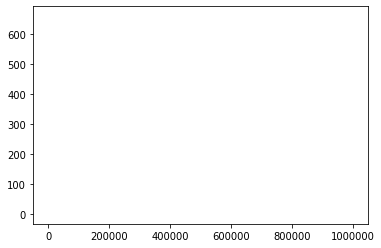

In [35]:
np.random.seed(0)
xx, yy = np.meshgrid(np.linspace(-4, 8, 500),
                     np.linspace(-4, 8, 500))
separable = np.loadtxt('nonseparable.txt')
X = separable[:,:2]
t = separable[:,2]
C = 1
C_range = np.logspace(-2, 6, 4)
print(C_range)
gamma_range = np.logspace(-2,3 , 4)
print(gamma_range)

Xp = np.c_[xx.ravel(), yy.ravel()]
for C in tqdm(C_range):
    for gamma in gamma_range:
    #      Call function
        a,score = svm(X, t, C, rbf, Xp)
        to = np.mean(a)
        print(to)
        plt.plot(C, to)

plt.show()